In [1]:
import nltk

In [2]:
#nltk.download_shell()

In [3]:
 messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no, message,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

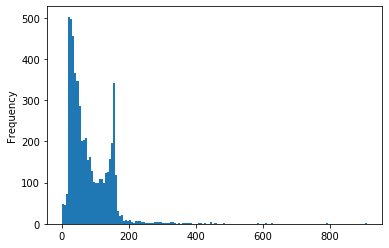

In [15]:
messages['length'].plot.hist(bins=150)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000009B1EE30AC8>,
      dtype=object)

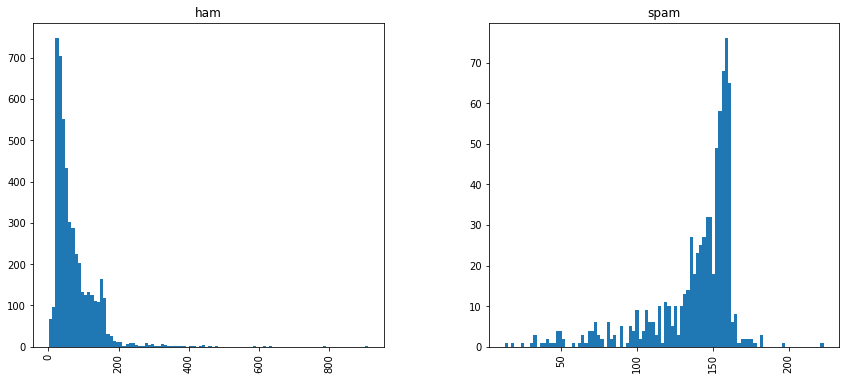

In [18]:
messages.hist(column='length',by='label',bins=100,figsize=(14,6))

In [19]:
import string

In [20]:
mess = 'Sample message! Notice it has punctuation.'

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [23]:
nopunc = "".join(nopunc)

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [27]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [30]:
def text_process(mess):
    """
    1.Remove punc
    2.Remove stop words
    3.Return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [31]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [35]:
print(bow_transformer.vocabulary_)

{'Go': 2060, 'jurong': 7555, 'point': 8917, 'crazy': 5769, 'Available': 1110, 'bugis': 5218, 'n': 8336, 'great': 6937, 'world': 11163, 'la': 7668, 'e': 6217, 'buffet': 5217, 'Cine': 1483, 'got': 6906, 'amore': 4653, 'wat': 10965, 'Ok': 3064, 'lar': 7701, 'Joking': 2451, 'wif': 11072, 'u': 10698, 'oni': 8590, 'Free': 1941, 'entry': 6331, '2': 423, 'wkly': 11123, 'comp': 5619, 'win': 11084, 'FA': 1833, 'Cup': 1551, 'final': 6557, 'tkts': 10512, '21st': 443, 'May': 2804, '2005': 430, 'Text': 3953, '87121': 871, 'receive': 9252, 'questionstd': 9159, 'txt': 10686, 'rateTCs': 9200, 'apply': 4731, '08452810075over18s': 73, 'U': 4068, 'dun': 6204, 'say': 9554, 'early': 6222, 'hor': 7186, 'c': 5261, 'already': 4629, 'Nah': 2948, 'dont': 6123, 'think': 10433, 'goes': 6877, 'usf': 10799, 'lives': 7842, 'around': 4777, 'though': 10450, 'FreeMsg': 1943, 'Hey': 2222, 'darling': 5864, '3': 543, 'weeks': 11011, 'word': 11150, 'back': 4893, 'Id': 2346, 'like': 7800, 'fun': 6755, 'still': 10093, 'Tb': 3

In [36]:
print(len(bow_transformer.vocabulary_))

11425


In [37]:
mess4 = messages['message'][3]

In [38]:
print(mess4)

U dun say so early hor... U c already then say...


In [39]:
bow4 = bow_transformer.transform([mess4])

In [40]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [41]:
print(bow4.shape)

(1, 11425)


In [42]:
bow_transformer.get_feature_names()[4068]

'U'

In [43]:
bow_transformer.get_feature_names()[9554]

'say'

In [44]:
messages_bow = bow_transformer.transform(messages['message'])

In [45]:
print('Shape of the sparse matrix: ',messages_bow.shape)

Shape of the sparse matrix:  (5572, 11425)


In [46]:
messages_bow.nnz

50548

In [47]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [50]:
tfidf4 = tfidf_transformer.transform(bow4)

In [51]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [52]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [53]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [56]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [57]:
messages['label'][3]

'ham'

In [58]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [59]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [62]:
msg_train

1587    There are no other charges after transfer char...
4051                   Ok ok take care. I can understand.
3256            HI ITS KATE CAN U GIVE ME A RING ASAP XXX
3866    THATS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG!...
3539    We are pleased to inform that your application...
                              ...                        
3269    Which is why i never wanted to tell you any of...
4510                        Ü takin linear algebra today?
3500    I hope you arnt pissed off but id would really...
2216        Prabha..i'm soryda..realy..frm heart i'm sory
2036        Simply sitting and watching match in office..
Name: message, Length: 3900, dtype: object

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB())
])

In [65]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000009B1FDC7438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [66]:
predictions = pipeline.predict(msg_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(label_test,predictions))
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1447
        spam       1.00      0.76      0.86       225

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

[[1447    0]
 [  54  171]]
